In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/davidliu/Desktop/IASC2025/la_fire_data/la_fire.csv")

/var/folders/xr/69vk_5_966g8wxf_bwqt42t80000gn/T/ipykernel_49768/1423021963.py:1: DtypeWarning: Columns (13,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/davidliu/Desktop/IASC2025/la_fire_data/la_fire.csv")


In [3]:
df.head()

,_id,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)","Street Suffix (e.g. apt. 23, blding C)",* City,State,Zip Code,...,Fire Name (Secondary),APN (parcel),Assessed Improved Value (parcel),Year Built (parcel),Site Address (parcel),GLOBALID,Latitude,Longitude,x,y
0,1,1,No Damage,8376.0,Quail Canyon,Road,NaN,Winters,CA,NaN,...,Quail,0101090290,510000.0,1997.0,8376 QUAIL CANYON RD VACAVILLE CA 95688,e1919a06-b4c6-476d-99e5-f0b45b070de8,38.474960,-122.044465,-1.358593e+07,4.646741e+06
1,2,2,Affected (1-9%),8402.0,Quail Canyon,Road,NaN,Winters,CA,NaN,...,Quail,0101090270,573052.0,1980.0,8402 QUAIL CANYON RD VACAVILLE CA 95688,b090eeb6-5b18-421e-9723-af7c9144587c,38.477442,-122.043252,-1.358579e+07,4.647094e+06
2,3,3,No Damage,8430.0,Quail Canyon,Road,NaN,Winters,CA,NaN,...,Quail,0101090310,350151.0,2004.0,8430 QUAIL CANYON RD VACAVILLE CA 95688,268da70b-753f-46aa-8fb1-327099337395,38.479358,-122.044585,-1.358594e+07,4.647366e+06
3,4,4,No Damage,3838.0,Putah Creek,Road,NaN,Winters,CA,NaN,...,Quail,0103010240,134880.0,1981.0,3838 PUTAH CREEK RD WINTERS CA 95694,64d4a278-5ee9-414a-8bf4-247c5b5c60f9,38.487313,-122.015115,-1.358266e+07,4.648497e+06
4,5,5,No Damage,3830.0,Putah Creek,Road,NaN,Winters,CA,NaN,...,Quail,0103010220,346648.0,1980.0,3830 PUTAH CREEK RD WINTERS CA 95694,1b44b214-01fd-4f06-b764-eb42a1ec93d7,38.485636,-122.016122,-1.358277e+07,4.648259e+06


In [4]:
df.shape

(100230, 47)

In [5]:
df.columns

Index(['_id', 'OBJECTID', '* Damage', '* Street Number', '* Street Name',
       '* Street Type (e.g. road, drive, lane, etc.)',
       'Street Suffix (e.g. apt. 23, blding C)', '* City', 'State', 'Zip Code',
       '* CAL FIRE Unit', 'County', 'Community', 'Battalion',
       '* Incident Name', 'Incident Number (e.g. CAAEU 123456)',
       'Incident Start Date', 'Hazard Type',
       'If Affected 1-9% - Where did fire start?',
       'If Affected 1-9% - What started fire?',
       'Structure Defense Actions Taken', '* Structure Type',
       'Structure Category', '# Units in Structure (if multi unit)',
       '# of Damaged Outbuildings < 120 SQFT',
       '# of Non Damaged Outbuildings < 120 SQFT', '* Roof Construction',
       '* Eaves', '* Vent Screen', '* Exterior Siding', '* Window Pane',
       '* Deck/Porch On Grade', '* Deck/Porch Elevated',
       '* Patio Cover/Carport Attached to Structure',
       '* Fence Attached to Structure', 'Distance - Propane Tank to Structure',
    

In [6]:
df.isna().sum()[df.isna().sum() > 0]

* Street Number                                                  4420
* Street Name                                                    5486
* Street Type (e.g. road, drive, lane, etc.)                    13197
Street Suffix (e.g. apt. 23, blding C)                          56082
* City                                                          31614
State                                                               7
Zip Code                                                        52801
County                                                             30
Community                                                       47338
Battalion                                                       93832
If Affected 1-9% - Where did fire start?                        89490
If Affected 1-9% - What started fire?                           91214
Structure Defense Actions Taken                                 75760
# Units in Structure (if multi unit)                            69046
# of Damaged Outbuil

In [7]:
df['County'].unique()

array(['Solano', 'Sacramento', 'Butte', 'San Luis Obispo', 'Siskiyou',
       'Santa Clara', 'San Benito', 'Lassen', 'Riverside',
       'San Bernardino', 'El Dorado', 'Kern', 'Nevada', 'Napa', 'Shasta',
       'Tehama', 'Glenn', 'Los Angeles', 'Mendocino', 'Yuba', 'San Diego',
       'Trinity', 'Lake', 'Humboldt', 'Monterey', 'Plumas', 'Tulare',
       'Fresno', 'Madera', 'Sonoma', 'Yolo', 'San Mateo', 'Santa Cruz',
       'Alameda', 'Stanislaus', 'San Joaquin', 'Orange', 'Ventura',
       'Contra Costa', 'Calaveras', 'Tuolumne', 'Placer', 'Amador',
       'Mariposa', 'Santa Barbara', 'Mono', 'Inyo', 'Kings', 'Alpine',
       nan, 'Colusa'], dtype=object)

# Filter the LA County

In [8]:
df_la = df[df['County'].str.lower() == 'los angeles'].copy()
print(f"Filtered to LA County: {df_la.shape}")

Filtered to LA County: (3770, 47)


In [9]:
df_la['Incident Start Date']

673       8/12/2020 12:00:00 AM
674       8/12/2020 12:00:00 AM
675       8/12/2020 12:00:00 AM
676       8/12/2020 12:00:00 AM
677       8/12/2020 12:00:00 AM
                  ...          
100225    12/9/2024 12:00:00 AM
100226    12/9/2024 12:00:00 AM
100227    12/9/2024 12:00:00 AM
100228    12/9/2024 12:00:00 AM
100229    12/9/2024 12:00:00 AM
Name: Incident Start Date, Length: 3770, dtype: object

In [10]:
# Convert incident start date
df_la['Incident Start Date'] = pd.to_datetime(df_la['Incident Start Date'], errors='coerce')

# Drop rows with no valid date
df_la = df_la.dropna(subset=['Incident Start Date'])

# Add year, month
df_la['year'] = df_la['Incident Start Date'].dt.year
df_la['month'] = df_la['Incident Start Date'].dt.month


/var/folders/xr/69vk_5_966g8wxf_bwqt42t80000gn/T/ipykernel_49768/2723427782.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_la['Incident Start Date'] = pd.to_datetime(df_la['Incident Start Date'], errors='coerce')


In [12]:
keep_cols = [ '* Damage', 'Incident Start Date', 'Hazard Type','Latitude', 'Longitude', '* City', '* Structure Type', 'year', 'month'] #or more
df_la_clean = df_la[keep_cols].copy()


In [13]:
df_la_clean.isna().sum()[df_la_clean.isna().sum() > 0]

* City    569
dtype: int64

In [14]:
df_la_clean['* City'].unique()

array(['LAKE HUGHES', 'LAKE HUGHES ', 'LANCASTER ', 'LANCASTER', nan,
       'Los Angeles County', 'Malibu', 'Agoura Hills', 'Calabasas',
       'Hidden Hills', 'Westlake Village', 'Los Angeles', 'Los Angeles ',
       'Unincorporated', 'Santa Clarita', 'Lebec', 'Lancaster', 'Gorman',
       'Llano', 'Mt Baldy', 'North Hollywood', 'Monrovia', 'Wrightwood',
       'MT. BALDY', 'Mt. Baldy', 'Valyermo', 'Claremont'], dtype=object)

In [15]:
df_la_clean['Hazard Type'].unique()

array(['Fire'], dtype=object)

In [16]:
df_la_clean['* Damage'].unique()

array(['Destroyed (>50%)', 'Affected (1-9%)', 'Major (26-50%)',
       'Minor (10-25%)', 'No Damage', 'Inaccessible'], dtype=object)

In [17]:
df_la_clean['* Damage'].value_counts()

* Damage
Destroyed (>50%)    1975
No Damage           1166
Affected (1-9%)      379
Minor (10-25%)       113
Major (26-50%)        89
Inaccessible          48
Name: count, dtype: int64

In [18]:
df_la_clean['* Structure Type'].value_counts()

* Structure Type
Single Family Residence Single Story    1164
Utility Misc Structure                   969
Single Family Residence Multi Story      963
Mobile Home Double Wide                  184
Commercial Building Single Story         169
Multi Family Residence Multi Story       112
School                                    46
Mobile Home Single Wide                   42
Commercial Building Multi Story           42
Infrastructure                            28
Motor Home                                18
Mixed Commercial/Residential              15
Church                                     8
Mobile Home Triple Wide                    6
Multi Family Residence Single Story        4
Name: count, dtype: int64

In [19]:
df_la_clean = df_la_clean.rename(columns={
    '* Damage': 'Damage',
    'Hazard Type': 'Hazard_Type',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude',
    '* City': 'City',
    '* Structure Type': 'Structure_Type'
})

#df_la_clean = pd.DataFrame(df_la_clean)

In [20]:
# Reindex the DataFrame to have a new sequential index
df_la_clean = df_la_clean.reset_index(drop=True)

In [21]:
df_la_clean

,Damage,Incident Start Date,Hazard_Type,Latitude,Longitude,City,Structure_Type,year,month
0,Destroyed (>50%),2020-08-12,Fire,34.688407,-118.479803,LAKE HUGHES,Single Family Residence Single Story,2020,8
1,Destroyed (>50%),2020-08-12,Fire,34.689315,-118.473639,LAKE HUGHES,Utility Misc Structure,2020,8
2,Destroyed (>50%),2020-08-12,Fire,34.693059,-118.486957,LAKE HUGHES,Utility Misc Structure,2020,8
3,Destroyed (>50%),2020-08-12,Fire,34.692542,-118.487347,LAKE HUGHES,Mobile Home Double Wide,2020,8
4,Destroyed (>50%),2020-08-12,Fire,34.688467,-118.480281,LAKE HUGHES,Utility Misc Structure,2020,8
...,...,...,...,...,...,...,...,...,...
3765,No Damage,2024-12-09,Fire,34.033408,-118.700625,Malibu,Single Family Residence Single Story,2024,12
3766,No Damage,2024-12-09,Fire,34.033278,-118.700902,Malibu,Utility Misc Structure,2024,12
3767,No Damage,2024-12-09,Fire,34.033618,-118.701102,Malibu,Single Family Residence Single Story,2024,12
3768,No Damage,2024-12-09,Fire,34.032085,-118.698270,Malibu,Single Family Residence Multi Story,2024,12


In [22]:
fire_counts = df_la_clean.groupby(['year', 'month']).size().reset_index(name='fire_count')
print(fire_counts.head())

   year  month  fire_count
0  2017     12         293
1  2018     11        1712
2  2019     10         239
3  2020      8          39
4  2020      9         228


In [23]:
df_la_clean.to_csv("la_wildfire_cleaned.csv", index=False)

In [29]:
data = df_la_clean[df_la_clean["City"].str.strip() == "Los Angeles"]


In [30]:
np.unique(data["City"])

array(['Los Angeles', 'Los Angeles '], dtype=object)

In [31]:
data.to_csv("la_city_wildfire_cleaned.csv", index=False)

# EDA

In [108]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use only Latitude and Longitude
coords = df_la_clean[['Latitude', 'Longitude']].values


In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

damage_order = [
    'Destroyed (>50%)',
    'Major (26-50%)',
    'Minor (10-25%)',
    'Affected (1-9%)',
    'Inaccessible',
    'No Damage'
]

df_la_clean['Damage'] = pd.Categorical(df_la_clean['Damage'], categories=damage_order, ordered=True)
# Custom reversed color palette (dark red = most damage)
custom_palette = sns.color_palette("YlOrRd", n_colors=len(damage_order))[::-1]
damage_palette = dict(zip(damage_order, custom_palette))


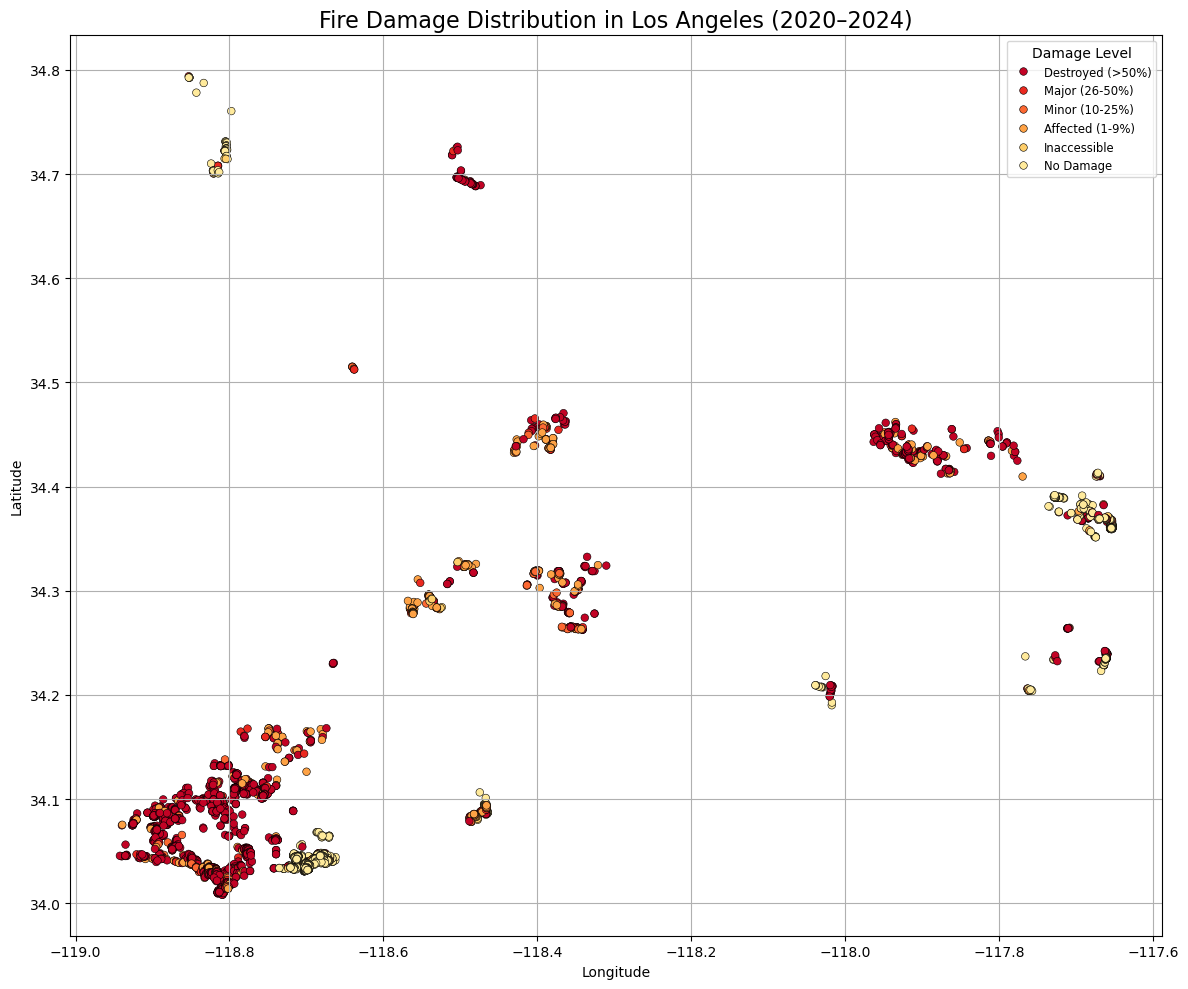

In [110]:
plt.figure(figsize=(12, 10), dpi=100)

sns.scatterplot(
    data=df_la_clean,
    x='Longitude',
    y='Latitude',
    hue='Damage',
    palette=damage_palette,
    s=30,
    edgecolor='black',
    linewidth=0.4
)

plt.title('Fire Damage Distribution in Los Angeles (2020–2024)', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Damage Level', loc='upper right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()
